In [1]:
words = open('names_es_ar.txt').read().splitlines()

In [2]:
chars = sorted(list(set("".join(words))))
n = len(chars)
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [ ]:
N = torch.zeros((n + 1, n + 1), dtype=torch.int32)

xs, ys = [], []
for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. B
B e
e n
n j
j a
a m
m i
i n
n .


In [9]:
xs

tensor([ 0,  4, 35, 44, 40, 31, 43, 39, 44])

In [10]:
ys

tensor([ 4, 35, 44, 40, 31, 43, 39, 44,  0])

In [18]:
xenc = F.one_hot(xs, num_classes=n + 1).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0

In [19]:
xenc.shape

torch.Size([9, 89])

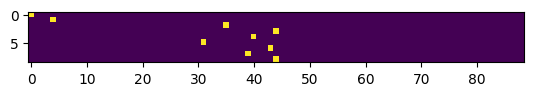

In [16]:
plt.imshow(xenc)

In [20]:
xenc.dtype

torch.float32

In [ ]:
W = torch.randn((n + 1, n + 1))
logists = xenc @ W
counts = logists.exp()
prob = counts / counts.sum(dim=1, keepdim=True)
prob


tensor(1.)

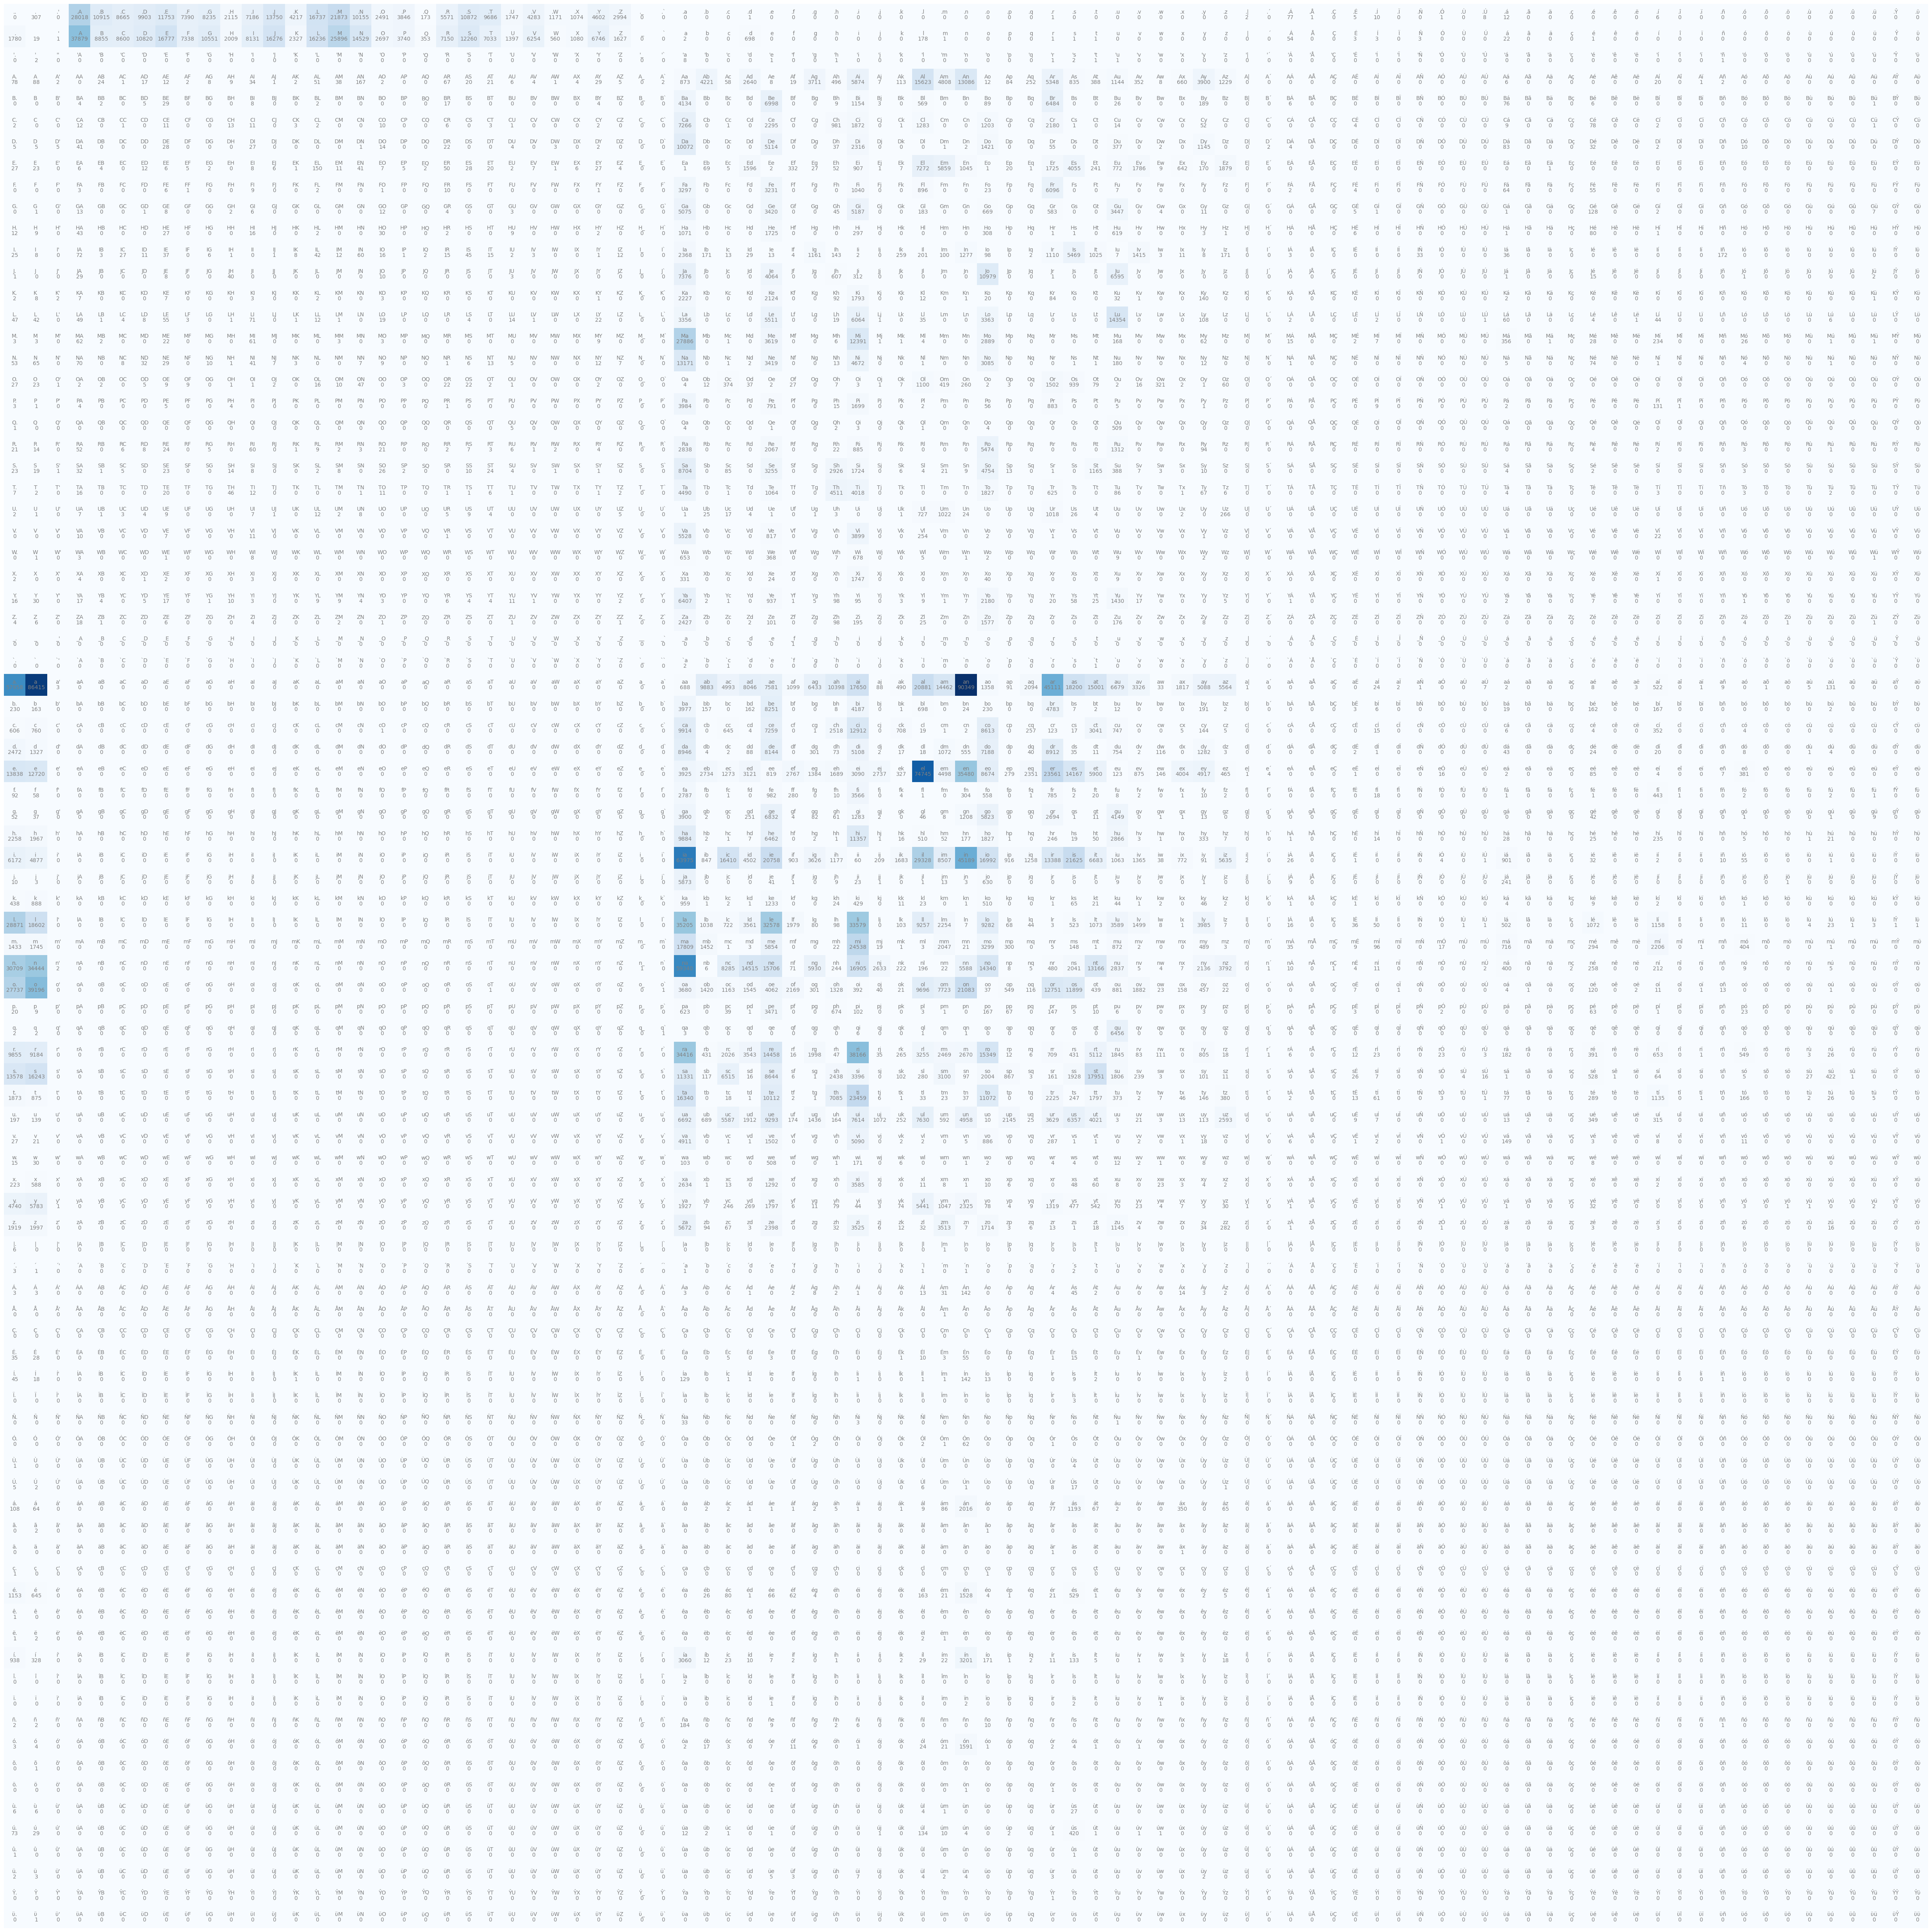

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(64,64))
plt.imshow(N, cmap='Blues')
for i in range(n+1):
    for j in range(n+1):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.show()

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('names_es_ar.txt').read().splitlines()

In [3]:
chars = sorted(list(set("".join(words))))
n = len(chars)
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [4]:
N = torch.zeros((n + 1, n + 1), dtype=torch.int32)
k = 0
xs, ys = [], []
for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        k += 1


xs = torch.tensor(xs)
ys = torch.tensor(ys)

. B
B e
e n
n j
j a
a m
m i
i n
n .


In [5]:
xs

tensor([ 0,  4, 35, 44, 40, 31, 43, 39, 44])

In [6]:
ys

tensor([ 4, 35, 44, 40, 31, 43, 39, 44,  0])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((n + 1, n + 1), generator=g, requires_grad=True)

In [18]:
xenc = F.one_hot(xs, num_classes=n + 1).float()
logists = xenc @ W  # predict log-counts
counts = logists.exp()  # counts
probs = counts / counts.sum(dim=1, keepdim=True)  # probabilities
loss = -probs[torch.arange(k), ys].log().mean()

In [19]:
probs.shape
probs
probs[0].sum()
k

9

In [15]:
# nlls = torch.zeros(k)
# for i in range(k):
#     x = xs[i].item()
#     y = ys[i].item()
#     print("----------")
#     print(f"bi-gram example {i+1}: {itos[x]}{itos[y]} ({x}, {y})")
#     print(f"input for neural net: {x}")
#     print(f"output of neural net: {probs[i]}")
#     print(f"target: {y}")
#     p = probs[i, y]
#     print(f"probability of target: {p.item()}")
#     logp = torch.log(p)
#     print(f"log likelihood: {logp.item()}")
#     nll = -logp
#     print(f"nll: {nll.item()}")
#     nlls[i] = nll

# print(f"average nll: {nlls.mean().item()}")

In [20]:
print(loss.item())

4.720331192016602


In [16]:
# backward pass
W.grad = None # set to zero gradients
loss.backward()

In [17]:
W.data += -0.1 * W.grad